# Lesson 2: Loops and Functions

---

![Image of Yaktocat](https://github.com/AnastasisKratsios/Python_Basics/blob/main/Supporting_Documents/LogicalTest.png?raw=true)

---

In this notebook, we'll explore two fundamental concepts in Python: **loops** and **functions**. These are essential tools for controlling the flow of your program and creating reusable code blocks.


## Loops
Loops are used to repeat a block of code multiple times. Python supports two main types of loops: **for loops** and **while loops**.

#### For Loops

For loops are often used to iterate over a sequence (like a list, tuple, or string) or a range of numbers.


In [4]:
# Iterate over a list
fruits = ["apple", "banana", "cherry"]
for fruit in fruits:
    print(fruit)

# Iterate through a range of numbers
for i in range(5):
    print(i)

apple
banana
cherry
0
1
2
3
4


#### While Loops

While loops execute a block of code repeatedly as long as a given condition is `True`.

Here's an example of a `while` loop.

In [35]:
count = 0
while count < 5:
    print(count)
    count += 1

0
1
2
3
4


### Nesting Loops
Loops can be nested.  Let's see how this can be used to populate a matrix of zeros.

In [41]:
# Initialize matrix
import numpy as np

A_zeros = np.zeros([10,5])

# Outer loop, runs over rows
for i in range(A_zeros.shape[0]):
    # Inner loop, runs over columns in a given row
    for j in range(A_zeros.shape[1]):
        A_zeros[i,j] = i+j

# Let's see the result
print(A_zeros)

[[ 0.  1.  2.  3.  4.]
 [ 1.  2.  3.  4.  5.]
 [ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10. 11.]
 [ 8.  9. 10. 11. 12.]
 [ 9. 10. 11. 12. 13.]]


**Pro-tip:** *Referring to your numpy dimensions directly with the `.shape` operations makes your code less susseptible to breaking if some, otherwise, hard-coded parameter is modified earlier on.*

## Functions

Functions allow you to encapsulate code into reusable blocks. They improve code organization and maintainability.

#### Defining a Function

Use the `def` keyword to define a function. Functions can accept parameters and return values.

In [8]:
def greet(name):
    """A function to greet the user."""
    print(f"Hello, {name}!")

def add(a, b):
    """A function to add two numbers."""
    return a + b

#### Using Functions

Call functions by their name, providing any required arguments. Capture and use return values if the function has one.

In [9]:
greet("Alice")          
sum_result = add(5, 7)  
print(sum_result)    

Hello, Alice!
12


Functions can greatly enhance code reusability and readability.

## Combining Loops and Functions

You can use loops to repeatedly call functions, making your code more efficient and dynamic.  For example, you can use a loop to call a function multiple times.

In [11]:
for i in range(3):
    greet("User " + str(i))

Hello, User 0!
Hello, User 1!
Hello, User 2!


## Functions with NumPy Arrays
Next, let's see how to apply functions on numpy arrays.  This, therefore, builds on our last lesson.

Let's start by defining a custom function that operates on individual elements, by squaring them and taking their cosine.

In [13]:
def custom_function(x):
    return np.cos(x ** 2)

To efficiently apply a function to a numpy array, we will use the `Vectorize` function, which has an input a function with float (scalar) inputs and outputs a has hash function.  Here, a `hash` function is a function which operators on NumPy arrays of arbitary, not predefined, size.

### Vectorization with NumPy

Now, you can apply the `square` function to a NumPy array using the array's built-in operations:

In [17]:
# Create a NumPy array
A = np.array([1, 2, 3, 4, 5])

Let's vectorized our custom function

In [18]:
custom_function__vectorized = np.vectorize(custom_function)

Let's apply the vectorizsed custom function and see the result.

In [20]:
# apply vectorized function
Vectorized_arr = custom_function__vectorized(A)

# print array
print(Vectorized_arr)

[ 0.54030231 -0.65364362 -0.91113026 -0.95765948  0.99120281]


### Lambda Functions

So-called **lambda functions**, which are small, anonymous functions, to apply custom operations. Here's how to square each element using a lambda function:

In [27]:
# Apply a lambda function to the array
result_lambda = np.vectorize(lambda x: custom_function(x))(A)

# readout
print(result_lambda)

[ 0.54030231 -0.65364362 -0.91113026 -0.95765948  0.99120281]


### Applying Functions Along Axes

You can also apply functions along specific axes of multidimensional arrays using functions like `np.apply_along_axis()`.

In [30]:
# Apply the custom function along columns (axis=0)
result_col = np.apply_along_axis(square, axis=0, arr=A_2d)

# Readout
result_col

array([[0.95769119, 0.91010871],
       [0.6747589 , 0.60811558],
       [0.55495869, 0.99986594]])

### Summary - A note on Computational Efficiency

There are various other possibilities for applying a function to a NumPy array.  In general, like R, Python is most efficient when it comes to vectorial operations and **not** with loops.  Therefore, try and write your code as "vectorially as possible".  

To get this point across, let's peek at some perfomance comparisons of different ways to apply our custom function to some arrays.

**Comment:** *You'll have to install the `math` and `perfplot` packages.*

Output()

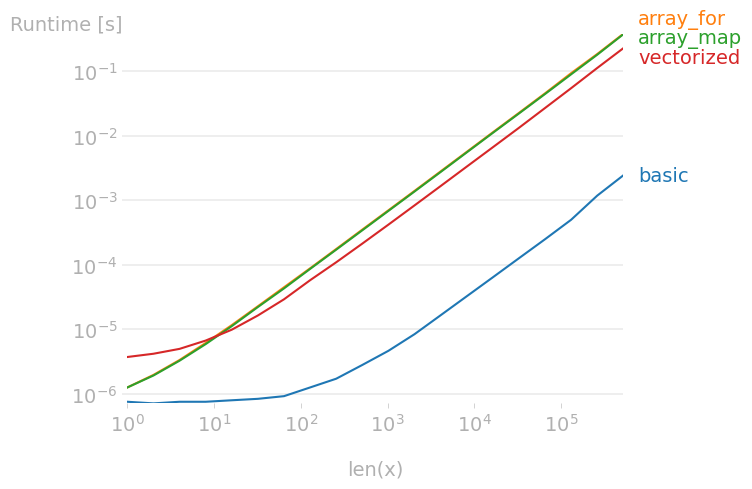

In [33]:
import perfplot
import math

def basic(x):
    return custom_function(x)

def array_for(x):
    return np.array([custom_function(xi) for xi in x])


def array_map(x):
    return np.array(list(map(custom_function, x)))


def vectorized(x):
    return custom_function__vectorized(x)


b = perfplot.bench(
    setup=np.random.rand,
    n_range=[2 ** k for k in range(20)],
    kernels=[
        basic,
        array_for,
        array_map,
        vectorized,
    ],
    xlabel="len(x)",
)
b.save("out1.svg")
b.show()

As we see, vectorize is faster than looping.  Also, (sometimes) the direct application of the functions is best.

---
# Fin
---